In [1]:
# 1
my_string = 'write write write all the number from from from 1 to 100'

def frequent_word(string):
    """ Returns most frequently occurring word from a string."""

    list_of_substrings = string.split()
    checked_words = {}
    most_frequent_occur = 0

    for i in list_of_substrings:
        if i in checked_words:
            continue
        else:
            occur = list_of_substrings.count(i)
            checked_words[i]= occur
    most_frequent_occur = max(checked_words.values())
   
    print(checked_words)
    list_most_frequent_occurred_words = []
    for k, v in checked_words.items():
        if v == most_frequent_occur:
            list_most_frequent_occurred_words.append(k)
    
    max_len = 0
    for i in list_most_frequent_occurred_words:
        if len(i) > max_len:
            max_len = len(i)
    return(max_len)
frequent_word(my_string)

{'write': 3, 'all': 1, 'the': 1, 'number': 1, 'from': 3, '1': 1, 'to': 1, '100': 1}


5

In [2]:
frequent_word("I am not not able to read it")

{'I': 1, 'am': 1, 'not': 2, 'able': 1, 'to': 1, 'read': 1, 'it': 1}


3

In [3]:
frequent_word("I I I will read it tomorrow")

{'I': 3, 'will': 1, 'read': 1, 'it': 1, 'tomorrow': 1}


1

In [4]:
# 2
my_string = "aabbcc" 


def string_checker(string):
    """returns a YES if if all characters of the string appear the same number of times"""

    list_of_strings = []
    checked_words = {}

    for i in string:
        list_of_strings.append(i)
    for i in list_of_strings:
        if i in checked_words:
            continue
        else:
            occur = list_of_strings.count(i)
            checked_words[i]= occur
    print(checked_words) 


    for v in checked_words.values():
        for v1 in checked_words.values():
            if v == v1:
                continue
            else:
                return "NO"
    return "YES"


string_checker(my_string)

{'a': 2, 'b': 2, 'c': 2}


'YES'

In [5]:
string_checker("Okay")

{'O': 1, 'k': 1, 'a': 1, 'y': 1}


'YES'

In [6]:
string_checker("noob")

{'n': 1, 'o': 2, 'b': 1}


'NO'

In [7]:
# 3
import pandas as pd 

Link ="https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json"

data = pd.read_json(Link,orient="columns")
dict= data['pokemon']

tabled_json = pd.json_normalize(dict)
# tabled_json.head()

output_path = 'pokemon.xlsx'
tabled_json.to_excel(output_path, index=False)

print("Jason Data loaded and saved as Excel successfully.")

URLError: <urlopen error [WinError 10061] No connection could be made because the target machine actively refused it>

In [ ]:
# 4
import pandas as pd

# loading the data

Link = "https://data.nasa.gov/resource/y77d-th95.json"
data = pd.read_json(Link, orient = "columns")
data.head(2)

In [ ]:
# dropping the unnecessary columns: 
data = data.drop(labels=[":@computed_region_nnqa_25f4", ":@computed_region_cbhk_fwbd"], axis=1)
data.head(2)

In [ ]:
# reformating year value:

data["year"] = data['year'].str[:4]
data.head(2)

In [ ]:
# getting values for coordinates:
for i in range(len(data)):
    if pd.isnull(data["geolocation"][i]):
        continue
    else:
        data["geolocation"][i] = data["geolocation"][i]["coordinates"]

data.head(2)

In [ ]:
output_path = 'space.csv'
data.to_csv(output_path, index=False)

print("Jason Data loaded and saved as Excel successfully.")

In [ ]:
# 5
import requests
import json
from bs4 import BeautifulSoup

def download_and_extract_data(url):
    # Download the data from the API link
    response = requests.get(url)
    data = response.json()

    # Extract the required data attributes
    show_id = data['id']
    show_url = data['url']
    show_name = data['name']
    episodes = data['_embedded']['episodes']
    
    episode_list = []
    for episode in episodes:
        episode_season = episode['season']
        episode_number = episode['number']
        episode_type = episode['type']
        episode_airdate = episode['airdate']
        episode_airtime = episode['airtime']
        episode_runtime = episode['runtime']
        episode_rating = episode['rating']['average']
        episode_summary = BeautifulSoup(episode['summary'], 'html.parser').get_text()
        episode_image_medium = episode['image']['medium']
        episode_image_original = episode['image']['original']
        
        episode_info = {
            'ID': show_id,
            'URL': show_url,
            'Name': show_name,
            'Season': episode_season,
            'Number': episode_number,
            'Type': episode_type,
            'Airdate': episode_airdate,
            'Airtime': episode_airtime,
            'Runtime': episode_runtime,
            'Rating': episode_rating,
            'Summary': episode_summary,
            'Medium Image': episode_image_medium,
            'Original Image': episode_image_original
        }
        episode_list.append(episode_info)

    # Print the extracted data attributes with proper formatting
    print("Show ID:", show_id)
    print("Show URL:", show_url)
    print("Show Name:", show_name)
    print("\nEpisodes:")
    for episode in episode_list:
        print("ID:", episode['ID'])
        print("URL:", episode['URL'])
        print("Name:", episode['Name'])
        print("Season:", episode['Season'])
        print("Number:", episode['Number'])
        print("Type:", episode['Type'])
        print("Airdate:", episode['Airdate'])
        print("Airtime:", episode['Airtime'])
        print("Runtime:", episode['Runtime'])
        print("Rating:", episode['Rating'])
        print("Summary:", episode['Summary'])
        print("Medium Image:", episode['Medium Image'])
        print("Original Image:", episode['Original Image'])
        print()

# Provide the API link to download the data
url = 'http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes'

# Call the function to download and extract the data attributes
download_and_extract_data(url)

In [ ]:
# 6
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
path = "Downloads/pokemon.xlsx"
pokemon = pd.read_excel(path)

pokemon.head()

In [ ]:
df = pokemon

In [ ]:
df['spawn_time'].isnull().sum()

In [ ]:
# converting spawn time in minutes format:
temp_df = df['spawn_time'].str.split(":")
df["spawn_min"] = None
for i in range(len(temp_df)):
    if pd.isnull(df["spawn_time"][i]):
        continue
    else:
        # df['spawn_min'] = 0
        df['spawn_min'][i] = (int(temp_df[i][0])*60) + int(temp_df[i][1])

In [ ]:
df.head()

In [ ]:
import pandas as pd
df["spawn_rate"] = None 
for i in range(len(df)):
    if pd.isnull(df["spawn_min"][i]):
        continue
    else:
        df['spawn_rate'][i] = (df['spawn_chance'][i] * (df['avg_spawns'][i]) * 100) / int(df['spawn_min'][i])


In [ ]:
df.head()

In [ ]:
# final result:
df[df["spawn_rate"] < 5]

In [ ]:
df.info()

In [ ]:
import pandas as pd
import ast

df['weaknesses'] = df['weaknesses'].apply(ast.literal_eval) # it changes object to list 

df['weaknesses'].apply(len)

In [ ]:
# final Result:
weakness_threshold = 4
pokemon_with_less_than_4_weaknesses = pokemon[df['weaknesses'].apply(len) < weakness_threshold]
pokemon_with_less_than_4_weaknesses[['num', 'name', 'weaknesses']]

In [ ]:
df[df["multipliers"].isnull()]

In [ ]:
df.head()

In [ ]:
pokemon_without_candy = df[df['candy'].isnull()]
pokemon_without_candy

In [ ]:
list_of_pokemons = df['candy'].unique()
list_of_pokemons

In [ ]:
pokemon_with_evolution = df['candy'].value_counts().to_dict()

In [ ]:
pokemon_with_evolution

In [ ]:
type(pokemon_with_evolution)

In [ ]:
pokemon_with_eval_greater_than_2 = []
pokemon_with_eval_less_than_2 = []
for k, v in pokemon_with_evolution.items():
    name = k.split()[0]
    if v > 3:
        pokemon_with_eval_greater_than_2.append(name)  
    else:
        pokemon_with_eval_less_than_2.append(name)

print("pokemon who have less than 2 evolutions", pokemon_with_eval_less_than_2)
print("-----------")
print("pokemon who have more than 2 evolutions", pokemon_with_eval_greater_than_2)

In [ ]:
list(pokemon_without_candy['name'])

In [ ]:
pokemon_with_eval_less_than_2.extend(list(pokemon_without_candy['name']))
print("updated list of pokemon with eval less than 2", pokemon_with_eval_less_than_2)
print("number of pokemon's: ", len(pokemon_with_eval_less_than_2))

In [ ]:
list(df[df['id']==133]['prev_evolution']) # this makes my previous logic wrong...

In [ ]:
def convert_to_list(string):
    try:
        return ast.literal_eval(string)
    except (SyntaxError, ValueError):
        return []

df['next_evolution'] = df['next_evolution'].apply(convert_to_list)

In [ ]:
for i in range(len(df)):
    if pd.isnull(df['next_evolution']).iloc[i]:
        df.loc[i,'total_evolutions'] =0
    else:
        df.loc[i,'total_evolutions']=len(df['next_evolution'].iloc[i])

In [ ]:
filtered_df=df[df['total_evolutions']<=2]
pokemon_with_less_than_2evolutions=len(filtered_df)
pokemon_with_less_than_2evolutions

In [ ]:
filtered_df

In [ ]:
def convert_to_list(string):
    try:
        return ast.literal_eval(string)
    except (SyntaxError, ValueError):
        return []

In [ ]:
import json


In [ ]:
df[df['type'].apply(len) > 2]

In [ ]:
df['type'].apply(len) > 2

In [ ]:
# There are no pokemon more than two types of capabilities

In [23]:
# 7
import pandas as pd
import folium
link_to_data = "Downloads/space.csv"
df = pd.read_csv(link_to_data)

df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"[6.08333, 50.775]"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"[10.23333, 56.18333]"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"[-113, 54.21667]"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"[-99.9, 16.88333]"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"[-64.95, -33.16667]"


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         1000 non-null   object 
 1   id           1000 non-null   int64  
 2   nametype     1000 non-null   object 
 3   recclass     1000 non-null   object 
 4   mass         972 non-null    float64
 5   fall         1000 non-null   object 
 6   year         999 non-null    float64
 7   reclat       988 non-null    float64
 8   reclong      988 non-null    float64
 9   geolocation  988 non-null    object 
dtypes: float64(4), int64(1), object(5)
memory usage: 78.2+ KB


In [25]:
df[df['year']< 2000]

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"[6.08333, 50.775]"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"[10.23333, 56.18333]"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"[-113, 54.21667]"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"[-99.9, 16.88333]"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"[-64.95, -33.16667]"
...,...,...,...,...,...,...,...,...,...,...
994,Timochin,24004,Valid,H5,65500.0,Fell,1807.0,54.50000,35.20000,"[35.2, 54.5]"
995,Tirupati,24009,Valid,H6,230.0,Fell,1934.0,13.63333,79.41667,"[79.41667, 13.63333]"
997,Tjabe,24011,Valid,H6,20000.0,Fell,1869.0,-7.08333,111.53333,"[111.53333, -7.08333]"
998,Tjerebon,24012,Valid,L5,16500.0,Fell,1922.0,-6.66667,106.58333,"[106.58333, -6.66667]"


In [26]:
filtered_df = df[df['year']< 1970]
filtered_df["geolocation"]

0          [6.08333, 50.775]
1       [10.23333, 56.18333]
2           [-113, 54.21667]
4        [-64.95, -33.16667]
5               [71.8, 32.1]
               ...          
994             [35.2, 54.5]
995     [79.41667, 13.63333]
997    [111.53333, -7.08333]
998    [106.58333, -6.66667]
999        [34.76667, 47.85]
Name: geolocation, Length: 780, dtype: object

In [27]:
df[df['mass'] > 10000]

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"[-113, 54.21667]"
7,Agen,392,Valid,H5,30000.0,Fell,1814.0,44.21667,0.61667,"[0.61667, 44.21667]"
11,Aïr,424,Valid,L6,24000.0,Fell,1925.0,19.08333,8.38333,"[8.38333, 19.08333]"
16,Akyumak,433,Valid,"Iron, IVA",50000.0,Fell,1981.0,39.91667,42.81667,"[42.81667, 39.91667]"
27,Alfianello,466,Valid,L6,228000.0,Fell,1883.0,45.26667,10.15000,"[10.15, 45.26667]"
...,...,...,...,...,...,...,...,...,...,...
991,Tieschitz,23989,Valid,H/L3.6,28000.0,Fell,1878.0,49.60000,17.11667,"[17.11667, 49.6]"
992,Tilden,23998,Valid,L6,74800.0,Fell,1927.0,38.20000,-89.68333,"[-89.68333, 38.2]"
994,Timochin,24004,Valid,H5,65500.0,Fell,1807.0,54.50000,35.20000,"[35.2, 54.5]"
997,Tjabe,24011,Valid,H6,20000.0,Fell,1869.0,-7.08333,111.53333,"[111.53333, -7.08333]"


In [28]:
# Extract latitude and longitude columns
latitude = df['reclat']
longitude = df['reclong']

# Create a map object
map = folium.Map(location=[latitude.mean(), longitude.mean()], zoom_start=4)

In [29]:
backup = df

In [30]:
df.dropna()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"[6.08333, 50.775]"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"[10.23333, 56.18333]"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"[-113, 54.21667]"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"[-99.9, 16.88333]"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"[-64.95, -33.16667]"
...,...,...,...,...,...,...,...,...,...,...
995,Tirupati,24009,Valid,H6,230.0,Fell,1934.0,13.63333,79.41667,"[79.41667, 13.63333]"
996,Tissint,54823,Valid,Martian (shergottite),7000.0,Fell,2011.0,29.48195,-7.61123,"[-7.61123, 29.48195]"
997,Tjabe,24011,Valid,H6,20000.0,Fell,1869.0,-7.08333,111.53333,"[111.53333, -7.08333]"
998,Tjerebon,24012,Valid,L5,16500.0,Fell,1922.0,-6.66667,106.58333,"[106.58333, -6.66667]"


In [31]:
df = df.dropna()

In [32]:
df.isnull().sum()

name           0
id             0
nametype       0
recclass       0
mass           0
fall           0
year           0
reclat         0
reclong        0
geolocation    0
dtype: int64

In [33]:
for index, row in df.iterrows():
    folium.Marker([row['reclat'], row['reclong']], popup=row['geolocation']).add_to(map)

In [34]:
map

In [35]:
# 8
import requests
import json
from bs4 import BeautifulSoup
import pandas as pd

def download_and_extract_data(url):
    # Download the data from the API link
    response = requests.get(url)
    data = response.json()

 
    show_id = data['id']
    show_url = data['url']
    show_name = data['name']
    episodes = data['_embedded']['episodes']

    episode_list = []
    for episode in episodes:
        episode_name = episode['name']
        episode_season = episode['season']
        episode_number = episode['number']
        episode_type = episode['type']
        episode_airdate = episode['airdate']
        episode_airtime = episode['airtime']
        episode_runtime = episode['runtime']
        episode_rating = episode['rating']['average']
        episode_summary = BeautifulSoup(episode['summary'], 'html.parser').get_text()
        episode_image_medium = episode['image']['medium']
        episode_image_original = episode['image']['original']

        episode_info = {
            'ID': show_id,
            'URL': show_url,
            'Name': show_name,
            'Episode Name': episode_name,
            'Season': episode_season,
            'Number': episode_number,
            'Type': episode_type,
            'Airdate': episode_airdate,
            'Airtime': episode_airtime,
            'Runtime': episode_runtime,
            'Rating': episode_rating,
            'Summary': episode_summary,
            'Medium Image': episode_image_medium,
            'Original Image': episode_image_original
        }
        episode_list.append(episode_info)


    df = pd.DataFrame(episode_list)
    return df


In [36]:
url = 'http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes'

df = download_and_extract_data(url)

df

,ID,URL,Name,Episode Name,Season,Number,Type,Airdate,Airtime,Runtime,Rating,Summary,Medium Image,Original Image
0,1371,https://www.tvmaze.com/shows/1371/westworld,Westworld,The Original,1,1,regular,2016-10-02,21:00,68,8.0,A woman named Dolores is a free spirit in the ...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,1371,https://www.tvmaze.com/shows/1371/westworld,Westworld,Chestnut,1,2,regular,2016-10-09,21:00,60,7.7,Bernard suspects that someone is sabotaging th...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
2,1371,https://www.tvmaze.com/shows/1371/westworld,Westworld,The Stray,1,3,regular,2016-10-16,21:00,60,7.6,Bernard continues to investigate Dolores' supp...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
3,1371,https://www.tvmaze.com/shows/1371/westworld,Westworld,Dissonance Theory,1,4,regular,2016-10-23,21:00,60,7.9,While Dolores joins William and Logan on their...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
4,1371,https://www.tvmaze.com/shows/1371/westworld,Westworld,Contrapasso,1,5,regular,2016-10-30,21:00,60,8.0,Dolores takes the first step on her path of di...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
5,1371,https://www.tvmaze.com/shows/1371/westworld,Westworld,The Adversary,1,6,regular,2016-11-06,21:00,60,8.0,"While Maeve convinces Felix to show her ""upsta...",https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
6,1371,https://www.tvmaze.com/shows/1371/westworld,Westworld,Trompe L'Oeil,1,7,regular,2016-11-13,21:00,60,8.6,While William and Dolores travel to the unclai...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
7,1371,https://www.tvmaze.com/shows/1371/westworld,Westworld,Trace Decay,1,8,regular,2016-11-20,21:00,60,7.9,Bernard tries to cope with what he did under R...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
8,1371,https://www.tvmaze.com/shows/1371/westworld,Westworld,The Well-Tempered Clavier,1,9,regular,2016-11-27,21:00,60,8.5,Bernard forces Robert to take him back into hi...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
9,1371,https://www.tvmaze.com/shows/1371/westworld,Westworld,The Bicameral Mind,1,10,regular,2016-12-04,21:00,90,8.7,Delores finds out the truth about William's fa...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


In [37]:
# Optional step : 
output_path = 'movie.csv'
df.to_csv(output_path, index=False)

print("Data loaded and saved as CSV successfully.")

Data loaded and saved as CSV successfully.


In [38]:
df.head(3)

,ID,URL,Name,Episode Name,Season,Number,Type,Airdate,Airtime,Runtime,Rating,Summary,Medium Image,Original Image
0,1371,https://www.tvmaze.com/shows/1371/westworld,Westworld,The Original,1,1,regular,2016-10-02,21:00,68,8.0,A woman named Dolores is a free spirit in the ...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,1371,https://www.tvmaze.com/shows/1371/westworld,Westworld,Chestnut,1,2,regular,2016-10-09,21:00,60,7.7,Bernard suspects that someone is sabotaging th...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
2,1371,https://www.tvmaze.com/shows/1371/westworld,Westworld,The Stray,1,3,regular,2016-10-16,21:00,60,7.6,Bernard continues to investigate Dolores' supp...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


In [39]:
season_1 = df[df['Season'] == 1]
season_2 = df[df['Season'] == 2]
season_3 = df[df['Season'] == 3]
season_4 = df[df['Season'] == 4]

In [40]:
season_1_ratings = sum(season_1['Rating'])/len(season_1)
season_2_ratings = sum(season_2['Rating'])/len(season_2)
season_3_ratings = sum(season_3['Rating'])/len(season_3)
season_4_ratings = sum(season_4['Rating'])/len(season_4)
season_rating = [season_1_ratings, season_2_ratings, season_3_ratings, season_4_ratings]
season_name = [ 'season_1', 'season_2', 'season_3', 'season_4']


<Axes: >

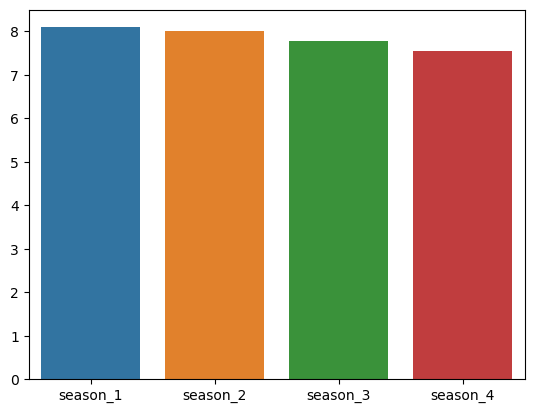

In [41]:
import seaborn as sns 

sns.barplot(data = df, x=season_name, y=season_rating, )

In [42]:
df[df['Rating'] > 8][['Episode Name', 'Rating']]

,Episode Name,Rating
6,Trompe L'Oeil,8.6
8,The Well-Tempered Clavier,8.5
9,The Bicameral Mind,8.7
17,Kiksuya,8.7
18,Vanishing Point,8.4
19,The Passenger,8.5


In [43]:
df['Airdate'].isnull().sum()

0

In [44]:
import pandas as pd

df['date_column'] = pd.to_datetime(df['Airdate'])

# Filter the DataFrame for data until May 2019
filtered_df = df[df['date_column'] <= '2019-05']
filtered_df[['Episode Name', 'Airdate']]

,Episode Name,Airdate
0,The Original,2016-10-02
1,Chestnut,2016-10-09
2,The Stray,2016-10-16
3,Dissonance Theory,2016-10-23
4,Contrapasso,2016-10-30
5,The Adversary,2016-11-06
6,Trompe L'Oeil,2016-11-13
7,Trace Decay,2016-11-20
8,The Well-Tempered Clavier,2016-11-27
9,The Bicameral Mind,2016-12-04


In [45]:
season_1 = df[df['Season'] == 1]
season_2 = df[df['Season'] == 2]
season_3 = df[df['Season'] == 3]
season_4 = df[df['Season'] == 4]
list_of_seasons = [season_1, season_2, season_3, season_4]

In [46]:
def low_high_ratings(season):
    """returns Low-High ratings per season"""
    ep_with_low_rat = list(season[season['Rating'] == season['Rating'].min()]['Episode Name'])
    ep_with_high_rat = list(season[season['Rating'] == season['Rating'].max()]['Episode Name'])
    return(
        ep_with_low_rat, ep_with_high_rat
    )

In [47]:
season_no = 1 
for i in list_of_seasons:
    ep_with_low_rat, ep_with_high_rat = low_high_ratings(i)
    print(f"Episodes with Hight ratings for season {season_no}: ", ep_with_high_rat)
    print(f"Episodes with low ratings for season {season_no}: ", ep_with_low_rat)
    season_no +=1 
    print("----------------------------------------")

Episodes with Hight ratings for season 1:  ['The Bicameral Mind']
Episodes with low ratings for season 1:  ['The Stray']
----------------------------------------
Episodes with Hight ratings for season 2:  ['Kiksuya']
Episodes with low ratings for season 2:  ['Akane No Mai']
----------------------------------------
Episodes with Hight ratings for season 3:  ['Parce Domine', 'The Mother of Exiles']
Episodes with low ratings for season 3:  ['Decoherence', 'Passed Pawn']
----------------------------------------
Episodes with Hight ratings for season 4:  ['Zhuangzi']
Episodes with low ratings for season 4:  ['The Auguries']
----------------------------------------


In [48]:
df.head(2)

,ID,URL,Name,Episode Name,Season,Number,Type,Airdate,Airtime,Runtime,Rating,Summary,Medium Image,Original Image,date_column
0,1371,https://www.tvmaze.com/shows/1371/westworld,Westworld,The Original,1,1,regular,2016-10-02,21:00,68,8.0,A woman named Dolores is a free spirit in the ...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,2016-10-02
1,1371,https://www.tvmaze.com/shows/1371/westworld,Westworld,Chestnut,1,2,regular,2016-10-09,21:00,60,7.7,Bernard suspects that someone is sabotaging th...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,2016-10-09


In [49]:
low_rat = df.groupby('Season')['Rating'].min()
high_rat = df.groupby('Season')['Rating'].max()
print(high_rat.items())
print(low_rat.items())

In [50]:
def high_low_rat(high_or_low):
    for season, rating in high_or_low.items():
        print(season, rating)
        episodes = list(df[(df['Season'] == int(season)) & (df['Rating'] == rating)]['Episode Name'])
        print(f"Episodes for season {season}: ", episodes)

In [51]:
high_low_rat(low_rat)

1 7.6
Episodes for season 1:  ['The Stray']
2 7.6
Episodes for season 2:  ['Akane No Mai']
3 7.5
Episodes for season 3:  ['Decoherence', 'Passed Pawn']
4 7.1
Episodes for season 4:  ['The Auguries']


In [52]:
high_low_rat(high_rat)

1 8.7
Episodes for season 1:  ['The Bicameral Mind']
2 8.7
Episodes for season 2:  ['Kiksuya']
3 8.0
Episodes for season 3:  ['Parce Domine', 'The Mother of Exiles']
4 7.8
Episodes for season 4:  ['Zhuangzi']


In [53]:
high_rating_per_season = df.groupby('Season')['Rating'].max()

In [54]:
episodes_with_high_rat_for_season = []

In [55]:
def summary_of_high_rating(high_rating_per_season):
    for season, rating in high_rating_per_season.items():
        # print(season, rating)
        episodes = list(df[(df['Season'] == int(season)) & (df['Rating'] == rating)]['Episode Name'])
        for i in episodes:
            print(f"Season: {season}, Highest rating: {rating}")
            print(f'{i}:')
            print( df[df['Episode Name'] == i]['Summary'])
            print("-----------------------------")

In [56]:
summary_of_high_rating(high_rating_per_season)

Season: 1, Highest rating: 8.7
The Bicameral Mind:
9    Delores finds out the truth about William's fa...
Name: Summary, dtype: object
-----------------------------
Season: 2, Highest rating: 8.7
Kiksuya:
17    Another of Westworld's Host revolutionaries is...
Name: Summary, dtype: object
-----------------------------
Season: 3, Highest rating: 8.0
Parce Domine:
20    If you're stuck in a loop, try walking in a st...
Name: Summary, dtype: object
-----------------------------
Season: 3, Highest rating: 8.0
The Mother of Exiles:
23    The truth doesn't always set you free.
Name: Summary, dtype: object
-----------------------------
Season: 4, Highest rating: 7.8
Zhuangzi:
32    God is bored.
Name: Summary, dtype: object
-----------------------------


In [1]:
# 9
import pandas as pd
import requests

In [2]:
url = "https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD"

df = pd.read_csv(url)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130443 entries, 0 to 130442
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         130443 non-null  object 
 1   County                                             130440 non-null  object 
 2   City                                               130440 non-null  object 
 3   State                                              130443 non-null  object 
 4   Postal Code                                        130440 non-null  float64
 5   Model Year                                         130443 non-null  int64  
 6   Make                                               130443 non-null  object 
 7   Model                                              130221 non-null  object 
 8   Electric Vehicle Type                              130443 non-null  object

In [ ]:
df.head()

In [4]:
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].unique()

array(['Clean Alternative Fuel Vehicle Eligible',
       'Not eligible due to low battery range',
       'Eligibility unknown as battery range has not been researched'],
      dtype=object)

In [5]:
df[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] != 'Clean Alternative Fuel Vehicle Eligible'][['Make','Model','Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility']]

,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility
6,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range
7,AUDI,Q5 E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range
8,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range
11,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...
14,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range
...,...,...,...,...
130437,BMW,530E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range
130438,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...
130439,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...
130440,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...


In [6]:
df[(df['Make']== 'TESLA') & (df['City'] == 'Bothell')][['Model', 'Model Year']]

,Model,Model Year
39,MODEL 3,2020
217,MODEL 3,2022
218,MODEL Y,2022
222,MODEL 3,2018
292,MODEL X,2017
...,...,...
129778,MODEL 3,2019
129954,MODEL 3,2021
129976,MODEL S,2014
130295,MODEL 3,2022


In [7]:
df.head(3)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10


In [8]:
df[(df['Model Year'] > 2015 ) & (df['Electric Range'] > 100)]

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10
12,5YJ3E1EC7L,Thurston,Lacey,WA,98503.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,22.0,2135486,POINT (-122.82324 47.04437),PUGET SOUND ENERGY INC,5.306701e+10
13,5YJ3E1EB2L,Thurston,Olympia,WA,98516.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,22.0,124645363,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130417,5YJYGDEE5L,Pierce,Tacoma,WA,98444.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,29.0,112591538,POINT (-122.46495 47.16778),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
130428,1N4AZ1CP0J,Clallam,Sequim,WA,98382.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151,0,24.0,290405174,POINT (-123.09968999999995 48.08137000000005),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.300900e+10
130432,5YJYGDEEXL,King,Vashon,WA,98070.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,34.0,112734723,POINT (-122.4573 47.44929),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
130436,5YJ3E1EB0J,Whatcom,Blaine,WA,98230.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,42.0,103521302,POINT (-122.74888 48.99404),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,5.307301e+10


In [9]:
df.head(2)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10


In [10]:
df['Electric Vehicle Type'].unique()

array(['Battery Electric Vehicle (BEV)',
       'Plug-in Hybrid Electric Vehicle (PHEV)'], dtype=object)

In [11]:
import seaborn as sns

In [12]:
list_of_cities = df['City'].unique()
print(list_of_cities)
print(len(list_of_cities))

['Yakima' 'Poulsbo' 'Seattle' 'Lacey' 'Olympia' 'Tumwater' 'Rochester'
 'Bremerton' 'Bainbridge Island' 'Everett' 'Leavenworth' 'Mill Creek'
 'Snohomish' 'Mount Vernon' 'Arlington' 'Lake Stevens' 'Burlington'
 'Anacortes' 'Edmonds' 'Bothell' 'Sultan' 'Spokane' 'Pullman' 'Yelm'
 'Port Orchard' 'Palouse' 'Monroe' 'Marysville' 'Mukilteo' 'Brier'
 'Lynnwood' 'Kettle Falls' 'Orondo' 'Selah' 'Oak Harbor' 'Clinton'
 'Cheney' 'Granite Falls' 'Renton' nan 'Walla Walla' 'Freeland' 'Kent'
 'Redmond' 'Vancouver' 'Tukwila' 'Federal Way' 'Kirkland' 'Bellevue'
 'Battle Ground' 'Duvall' 'Brush Prairie' 'Sammamish' 'Burien' 'Auburn'
 'Bingen' 'Camas' 'Issaquah' 'Shoreline' 'Covington' 'Woodinville'
 'Longview' 'Olalla' 'Normandy Park' 'Port Townsend' 'North Bend'
 'Seabeck' 'Medina' 'Maple Valley' 'Newcastle' 'Des Moines' 'Ridgefield'
 'Washougal' 'Kelso' 'Kenmore' 'Nine Mile Falls' 'Moxee' 'Seatac'
 'La Center' 'Lake Forest Park' 'Sunnyside' 'Kalama' 'Grandview' 'Sequim'
 'Beaux Arts' 'Silverdale' 'Qu

In [13]:
df.groupby("City")["Electric Vehicle Type"].count()

City
Aberdeen          115
Acme                7
Addy                2
Aiea                1
Airway Heights     18
                 ... 
Yacolt             32
Yakima            471
Yarrow Point      126
Yelm              197
Zillah             23
Name: Electric Vehicle Type, Length: 656, dtype: int64

In [14]:
top_20 = df.groupby("City")["Electric Vehicle Type"].count().sort_values(ascending=False)[:20]

In [15]:
x = list(dict(top_20).keys())
y = list(dict(top_20).values())

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: >

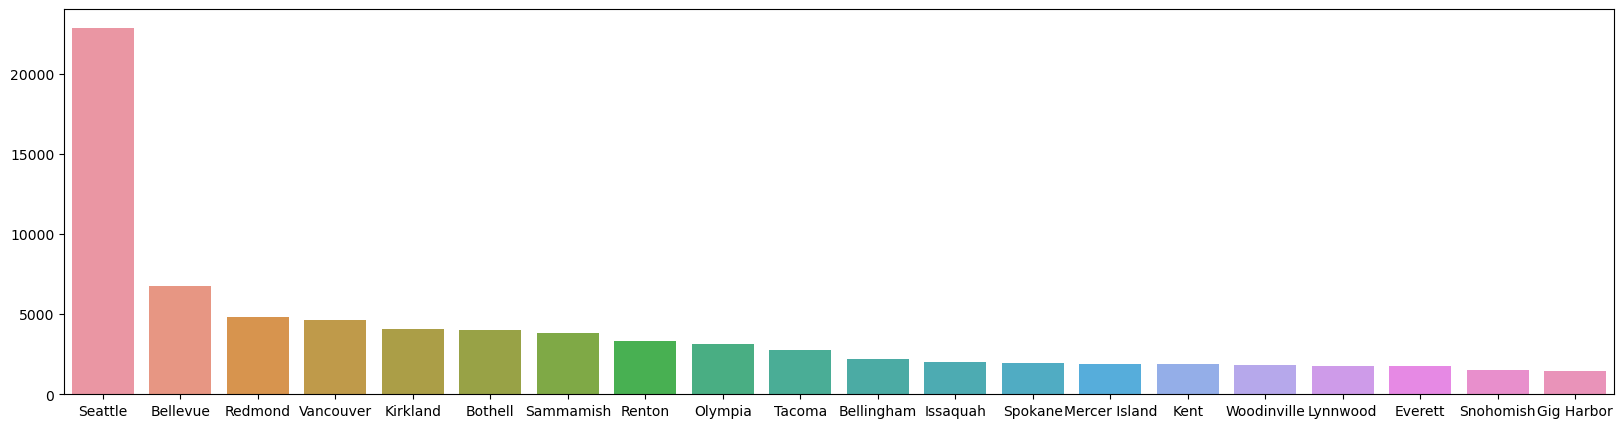

In [17]:
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(x=x, y=y)

In [18]:
# 10
import re

def count_pos_tags(text):
    # Define regular expressions for matching different parts of speech
    noun_pattern = re.compile(r'\b[A-Za-z]+[s]?\b', re.IGNORECASE)
    pronoun_pattern = re.compile(r'\b(I|me|my|mine|you|your|yours|he|him|his|she|her|hers|it|its|we|us|our|ours|they|them|their|theirs)\b', re.IGNORECASE)
    verb_pattern = re.compile(r'\b[A-Za-z]+(?:s|ed|ing)?\b', re.IGNORECASE)
    adjective_pattern = re.compile(r'\b[A-Za-z]+\b', re.IGNORECASE)

    # Initialize counts
    noun_count = 0
    pronoun_count = 0
    verb_count = 0
    adjective_count = 0

    # Find matches for each part of speech
    noun_matches = re.findall(noun_pattern, text)
    pronoun_matches = re.findall(pronoun_pattern, text)
    verb_matches = re.findall(verb_pattern, text)
    adjective_matches = re.findall(adjective_pattern, text)

    # Count the matches
    noun_count = len(noun_matches)
    pronoun_count = len(pronoun_matches)
    verb_count = len(verb_matches)
    adjective_count = len(adjective_matches)

    # Create and return the dictionary
    pos_counts = {
        'nouns': noun_count,
        'pronouns': pronoun_count,
        'verbs': verb_count,
        'adjectives': adjective_count
    }
    return pos_counts

# Test case 1
text = "I love to eat pizza."
result = count_pos_tags(text)
print(result)

#Test case 2
text = "The cat chased the mouse. It was quick and agile. The dog barked loudly."
result = count_pos_tags(text)
print(result)

{'nouns': 5, 'pronouns': 1, 'verbs': 5, 'adjectives': 5}
{'nouns': 14, 'pronouns': 1, 'verbs': 14, 'adjectives': 14}
